In [1]:
pip install -q tfds-nightly tensorflow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 56.0 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [4]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [6]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 3s 4ms/step - loss: 0.3588 - sparse_categorical_accuracy: 0.9015 - val_loss: 0.1899 - val_sparse_categorical_accuracy: 0.9464
Epoch 2/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1642 - sparse_categorical_accuracy: 0.9534 - val_loss: 0.1301 - val_sparse_categorical_accuracy: 0.9618
Epoch 3/6
469/469 [==============================] - 2s 3ms/step - loss: 0.1172 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1074 - val_sparse_categorical_accuracy: 0.9668
Epoch 4/6
469/469 [==============================] - 2s 3ms/step - loss: 0.0913 - sparse_categorical_accuracy: 0.9734 - val_loss: 0.0893 - val_sparse_categorical_accuracy: 0.9727
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0735 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.0849 - val_sparse_categorical_accuracy: 0.9727
Epoch 6/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0608 - sparse_categorical_accu

In [11]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


cnn_model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 5s 6ms/step - loss: 0.2428 - accuracy: 0.9258 - val_loss: 0.0524 - val_accuracy: 0.9830
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0576 - accuracy: 0.9821 - val_loss: 0.0425 - val_accuracy: 0.9865
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0311 - val_accuracy: 0.9905
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0465 - val_accuracy: 0.9855
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0249 - val_accuracy: 0.9921
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0258 - val_accuracy: 0.9923
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0282 - val_accuracy: 0.9902
Epoch 

In [8]:
print(ds_train)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


4/4 [==============================] - 0s 4ms/step


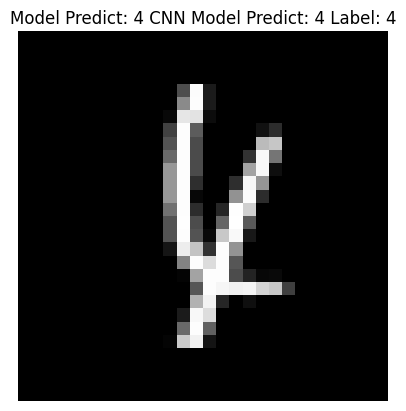

In [28]:
first_element = ds_train.take(1)

import random
for image, label in first_element:

    random_num = random.randint(0,128)
    img = image[random_num]
    lb = label[random_num]

    predict = model.predict(image)
    predict = predict[random_num]

    cnn_predict = cnn_model.predict(image)
    cnn_predict = cnn_predict[random_num]

    predict = np.argmax(predict)
    cnn_predict = np.argmax(cnn_predict)
    
    plt.imshow(img.numpy().squeeze(), cmap='gray')
    plt.title('Model Predict: {} CNN Model Predict: {} Label: {}'.format(predict, cnn_predict, lb.numpy()))
    plt.axis('off')
    plt.show()
    break

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def draw_confusion_matrix(model):
  # 테스트 데이터셋의 예측 수행
  y_pred = np.argmax(model.predict(ds_test), axis=-1)
  y_true = np.concatenate([y for _, y in ds_test], axis=0)

  # Confusion matrix 계산
  confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

  # Confusion matrix 시각화
  plt.imshow(confusion_matrix, cmap='Blues')
  plt.colorbar()
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.show()


79/79 [==============================] - 0s 3ms/step


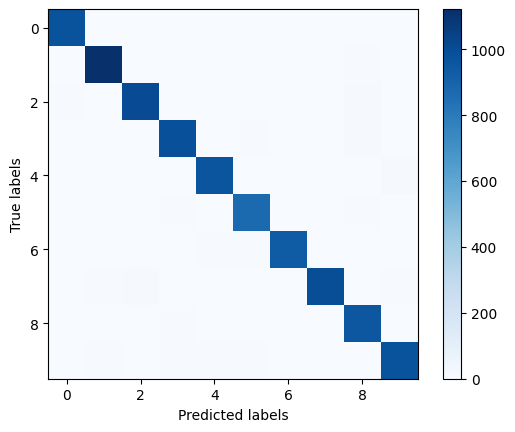

In [31]:
draw_confusion_matrix(model)

79/79 [==============================] - 0s 3ms/step


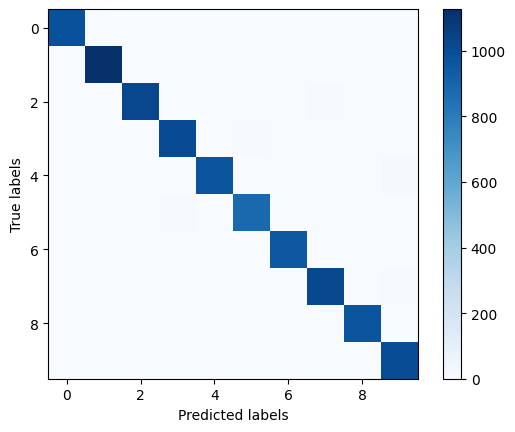

In [32]:
draw_confusion_matrix(cnn_model)